In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [40]:
Im = cv2.imread('Images/Fig0338(a)(blurry_moon).tif', cv2.IMREAD_GRAYSCALE)

''' 
Para realizar o primeiro passo da filtragem no domínio da frequência, precisamos construir uma imagem fp(x,y), com dimensões P e Q, 
tendo em vista que nossa imagem original Im(m,n) tem dimensões M e N. 
As dimensões P e Q devem ser escolhidas de modo que sejam maiores ou iguais a 2M -1 e 2N -1, respectivamente. 
Por convenção escolhemos P = 2M e Q = 2N. 
'''
M, N = Im.shape
P = 2 * M
Q = 2 * N
# Criando a imagem fp(x,y) preenchida com zeros
fp = np.zeros((P, Q), dtype=np.float32)

''' 
Agora, copiamos a imagem Im(m,n) para o canto superior esquerdo da imagem fp(x,y). Dessa maneira estmos utilizando a mesma imagem Im(m,n), preenchida com zeros.
Conforme foi solcicitado no passo a passo disponibilizado no livro.
'''
fp[0:M, 0:N] = Im

# Multiplicando fp(x,y) por (-1)^(x+y)
for x in range(P):
    for y in range(Q):
        fp[x, y] = fp[x, y] * ((-1) ** (x + y))

# Aplicando uma Transformada de Fourier 2D na imagem fp(x,y)
Fp = np.fft.fft2(fp)
# Espectro de magnitude da Transformada de Fourier 2D
magnitude_spectrum = np.log(np.abs(Fp))  # Adicionando 1 para evitar log(0)



In [41]:
# Agora geramos uma função de filtro H(u,v) utilizando as máscaras Laplacianas com os seguintes kernels:
# Kernel 1
H1 = np.array([[0, -1, 0],
               [-1, 4, -1],
               [0, -1, 0]], dtype=np.float32)
# Kernel 2
H2 = np.array([[-1, -1, -1],
               [-1, 8, -1],
               [-1, -1, -1]], dtype=np.float32)

# Para aplicar esses filtros no domínio da frequência, precisamos primeiro expandi-los para o tamanho P x Q.
H1_expanded = np.zeros((P, Q), dtype=np.float32)
H2_expanded = np.zeros((P, Q), dtype=np.float32)

# Colocando os kernels no canto superior esquerdo das matrizes expandidas
H1_expanded[0:3, 0:3] = H1
H2_expanded[0:3, 0:3] = H2

# Multiplicando os filtros expandidos por (-1)^(x+y)
for x in range(P):
    for y in range(Q):
        H1_expanded[x, y] = H1_expanded[x, y] * ((-1) ** (x + y))
        H2_expanded[x, y] = H2_expanded[x, y] * ((-1) ** (x + y))

# Aplicando a Transformada de Fourier 2D nos filtros expandidos
H1_freq = np.fft.fft2(H1_expanded)
H2_freq = np.fft.fft2(H2_expanded)

# Espectro de magnitude dos filtros no domínio da frequência
magnitude_H1 = np.log(np.abs(H1_freq))  
magnitude_H2 = np.log(np.abs(H2_freq))  



In [42]:
# Agora, multiplicamos a Transformada de Fourier 2D da imagem Fp(u,v) pelos filtros H1(u,v) e H2(u,v)
G1 = Fp * H1_freq
G2 = Fp * H2_freq
# Espectro de magnitude dos resultados da multiplicação
magnitude_G1 = np.log(np.abs(G1))  
magnitude_G2 = np.log(np.abs(G2))

# Aplicando a Transformada Inversa de Fourier 2D nos resultados G1(u,v) e G2(u,v)
g1 = np.fft.ifft2(G1)
g2 = np.fft.ifft2(G2)

# Multiplicando os resultados pela fator (-1)^(x+y)
for x in range(P):
    for y in range(Q):
        g1[x, y] = g1[x, y] * ((-1) ** (x + y))
        g2[x, y] = g2[x, y] * ((-1) ** (x + y))

# Extraindo a parte real e recortando para obter a imagem final de tamanho M x N
g1_final = np.real(g1[0:M, 0:N])
g2_final = np.real(g2[0:M, 0:N])

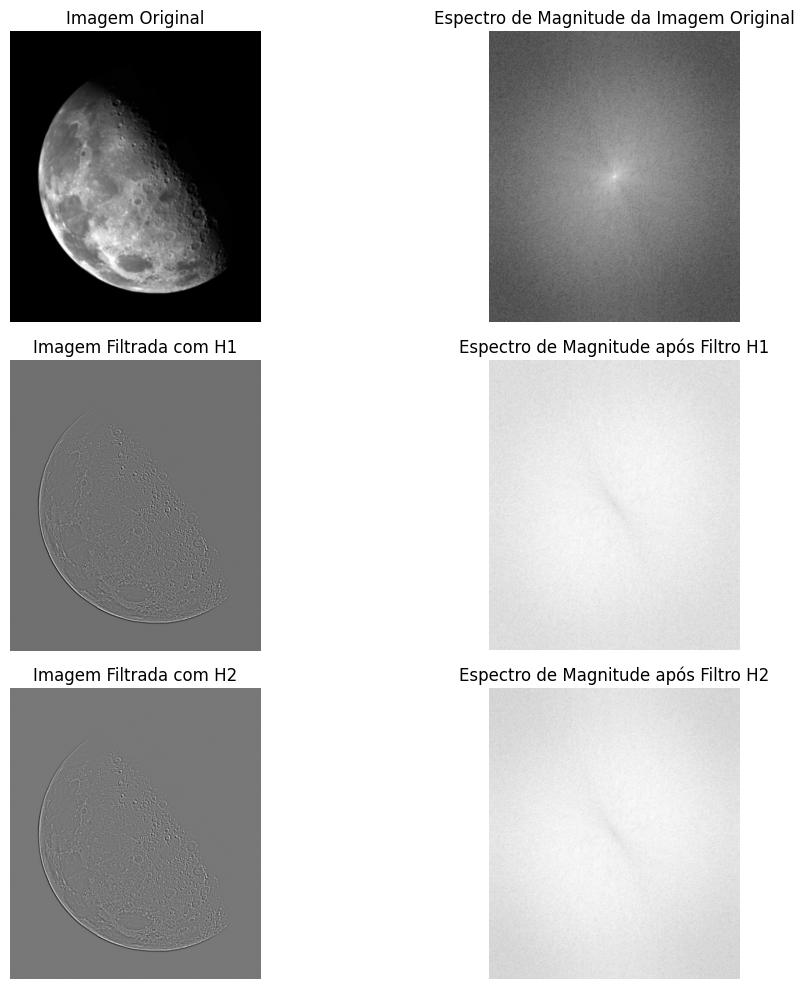

In [43]:
# Por fim, exibimos as imagens resultantes e seus respectivos espectros de magnitude
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.title('Imagem Original')
plt.imshow(Im, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 2)
plt.title('Espectro de Magnitude da Imagem Original')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 3)
plt.title('Imagem Filtrada com H1')
plt.imshow(g1_final, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 4)
plt.title('Espectro de Magnitude após Filtro H1')
plt.imshow(magnitude_G1, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 5)
plt.title('Imagem Filtrada com H2')
plt.imshow(g2_final, cmap='gray')
plt.axis('off')
plt.subplot(3, 2, 6)
plt.title('Espectro de Magnitude após Filtro H2')
plt.imshow(magnitude_G2, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()